In [1]:
import sys
sys.path.insert(0, "..")

In [2]:
import torch
import numpy as np

from matplotlib import pyplot as plt
from PIL import Image
from stable_baselines3 import SAC

from edm.utils import to_image

2024-12-10 03:50:50.686522: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-10 03:50:50.697035: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-10 03:50:50.709829: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-10 03:50:50.713797: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-10 03:50:50.723355: I tensorflow/core/platform/cpu_feature_guar

In [7]:
# model_path = "/home/kezhang/work/fall_2024/torchdriveenv/examples/models/collect_expert_dataset_1733360743/model"
model_path = "/home/kezhang/work/fall_2024/torchdriveenv/examples/test_sac_model"

In [8]:
model = SAC.load(model_path)

/home/kezhang/work/stochastic-critic/.venv/lib/python3.10/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 73.74GB > 44.23GB
  warnings.warn(


In [9]:
# model.__dir__()

In [10]:
# model.critic

In [11]:
# model.actor

In [12]:
# model.policy

In [13]:
# model.observation_space

In [14]:
# model.action_space

In [15]:
obs = torch.Tensor(model._last_obs).cuda()
# obs.shape

In [16]:
actions = model.actor(torch.Tensor(obs).cuda())
# actions

In [17]:
model.critic.q1_forward(obs, actions)

tensor([[ 93.1896],
        [ 55.7840],
        [105.9333],
        [ 22.6074],
        [ 70.4723],
        [ 44.4109]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [30]:
def plot_critic(fn, obs, device):
    nticks = 50
    x, y = np.meshgrid(np.linspace(-2, 2, nticks), np.linspace(-2, 2, nticks))
    x = torch.Tensor(x)
    y = torch.Tensor(y)
    coord = torch.stack([x, y], axis=-1).reshape((-1, 2)).to(device)
#     t = torch.Tensor([t]).int().expand((coord.shape[0], )).to(device)
    obs = obs.unsqueeze(0).expand((coord.shape[0], *obs.shape)).to(device)

    heatmap = fn(actions=coord, obs=obs).reshape(
        (nticks, nticks)).detach().cpu().transpose(0, 1).numpy()
    plt.imshow(heatmap)

#     return to_image(plt)

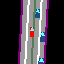

In [31]:
Image.fromarray(obs[1][:3].cpu().detach().numpy().astype(np.uint8).transpose(1, 2, 0), 'RGB')

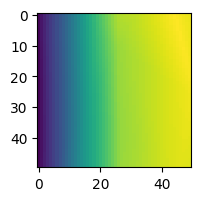

In [32]:
plt.figure(figsize=(2, 2))
plot_critic(model.critic.q1_forward, obs[1], torch.device("cuda"))

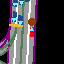

In [33]:
Image.fromarray(obs[0][:3].cpu().detach().numpy().astype(np.uint8).transpose(1, 2, 0), 'RGB')

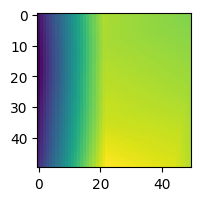

In [34]:
plt.figure(figsize=(2, 2))
plot_critic(model.critic.q1_forward, obs[0], torch.device("cuda"))

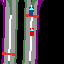

In [35]:
Image.fromarray(obs[3][:3].cpu().detach().numpy().astype(np.uint8).transpose(1, 2, 0), 'RGB')

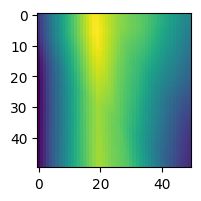

In [36]:
plt.figure(figsize=(2, 2))
plot_critic(model.critic.q1_forward, obs[3], torch.device("cuda"))